In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=50

In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\nasut\\OneDrive\\Documents\\Kuliah\\Semester 7\\PKKM\\BMKG\\Project\\MONAS-Dashboard\\Modelling'

In [10]:
df = pd.read_csv('../../Data/data_fix_prec.txt')
df

,Date,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,prec_obs,prec_nwp,prec_obs.group,prec_nwp.group
1,2021-02-27 15:00:00,96001,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.622,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
2,2021-02-27 18:00:00,96001,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,0.000000,0.000000,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.969,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
3,2021-02-27 21:00:00,96001,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,0.000000,0.000000,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.030,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
4,2021-02-28 00:00:00,96001,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,0.000000,0.000000,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.120,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
5,2021-02-28 03:00:00,96001,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,0.000000,0.000000,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.419,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543968,2023-04-12 03:00:00,99992,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.0,0.017163,149.840,805.937,885.802,1304.62000,0.0,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.484750,260.471,-4.69787,73.0758,2.29511,231.9670,0,12,-6.30253,106.75640,41,0.0,0.003601,no rain,no rain
543969,2023-04-12 06:00:00,99992,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.0,0.018095,155.006,1075.000,913.548,2185.44000,0.0,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.014090,248.417,-4.63960,75.7922,2.05083,268.5790,0,12,-6.30253,106.75640,41,0.0,3.669660,no rain,light rain
543970,2023-04-12 09:00:00,99992,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.0,0.018342,126.417,566.484,735.727,1989.83000,0.0,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.068280,248.233,-4.40575,77.1489,2.52709,272.9220,0,12,-6.30253,106.75640,41,0.0,4.045040,no rain,light rain
543971,2023-04-12 12:00:00,99992,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,0.0,0.018011,146.682,227.432,564.794,1213.66000,0.0,24.9000,74.5380,7.96001,239.4350,15.8302,80.2176,7.675180,256.296,-4.33471,76.3170,3.07955,259.2500,1,12,-6.30253,106.75640,41,0.0,0.000000,no rain,no rain


In [11]:
df_input_ina_nwp = pd.read_csv('../../Data/MONAS-input_nwp_compile.csv')
df_input_ina_nwp

,lokasi,Date,suhu2m(degC),dew2m(degC),rh2m(%),wspeed(m/s),wdir(deg),lcloud(%),mcloud(%),hcloud(%),surpre(Pa),clmix(kg/kg),wamix(kg/kg),outlr(W/m2),pblh(m),lifcl(m),cape(j/kg),mdbz,t950(degC),rh950(%),ws950(m/s),wd950(deg),t800(degC),rh800(%),ws800(m/s),wd800(deg),t500(degC),rh500(%),ws500(m/s),wd500(deg),prec_nwp,LAT,LON,ELEV
0,96001,2023-10-17 15:00:00,27.4007,23.6856,80.3053,4.25554,191.08600,0.374474,1.000000,0.855219,100903.0,0.0,0.017137,180.376,526.076,616.078,406.014,13.7824,23.0678,74.5583,5.87159,191.4640,16.0404,73.3359,8.18965,242.5890,-4.71925,94.9932,4.68350,76.8328,2.923480e-19,5.87655,95.33785,126
1,96001,2023-10-17 18:00:00,27.4089,23.0971,77.4673,3.20000,228.61600,0.262561,1.000000,0.872848,100735.0,0.0,0.016653,196.935,491.829,689.544,287.453,19.0351,23.3155,71.6113,4.21652,217.4370,15.9013,73.9679,6.67126,204.7110,-4.99763,95.7026,4.83021,124.4510,1.034630e-19,5.87655,95.33785,126
2,96001,2023-10-17 21:00:00,27.3820,23.8747,81.3127,6.43993,224.35900,0.431500,1.000000,0.849396,100655.0,0.0,0.017185,232.870,558.189,618.759,620.873,0.0000,22.9912,75.4084,8.67978,222.8060,15.6937,73.0260,5.34901,203.9090,-5.10086,95.3166,4.00113,107.2340,0.000000e+00,5.87655,95.33785,126
3,96001,2023-10-18 00:00:00,27.4679,23.7839,80.4639,6.91585,220.91600,0.317385,1.000000,0.524404,100769.0,0.0,0.016910,233.885,532.027,644.846,428.753,0.0000,22.9836,77.4899,8.76241,220.2100,15.4617,74.9905,4.76448,191.2090,-4.39951,84.1607,3.31394,114.2420,0.000000e+00,5.87655,95.33785,126
4,96001,2023-10-18 03:00:00,27.9673,23.2775,75.7992,6.28717,214.11300,0.252877,0.785813,0.610115,100950.0,0.0,0.016377,268.016,700.017,786.830,229.671,0.0000,23.1852,76.8484,7.11073,212.3090,14.9336,76.5370,3.94272,217.0360,-4.74009,86.5560,3.79705,166.5850,0.000000e+00,5.87655,95.33785,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,99992,2023-10-20 00:00:00,26.8513,19.0878,62.5816,1.52901,146.67200,0.051358,0.210951,0.000000,100571.0,0.0,0.013547,287.580,424.941,2139.000,-0.100,0.0000,23.6648,65.5740,5.75998,100.6410,15.3491,71.3439,9.53871,94.4738,-4.78717,37.3070,3.18159,304.7020,0.000000e+00,-6.30253,106.75636,41
4148,99992,2023-10-20 03:00:00,32.5296,17.3364,40.4115,2.83196,76.91420,0.000000,0.227088,0.000000,100550.0,0.0,0.012277,304.315,1399.820,1910.010,-0.100,0.0000,26.7487,51.9330,3.24100,85.2487,15.5818,60.1363,10.88190,99.9526,-4.34492,31.4119,2.67764,274.8970,0.000000e+00,-6.30253,106.75636,41
4149,99992,2023-10-20 06:00:00,33.2196,21.2222,49.5108,6.39935,10.12190,0.000000,0.495652,0.000000,100316.0,0.0,0.015354,301.166,1036.540,1510.300,1030.700,0.0000,27.3323,60.4585,7.04615,15.0992,15.9853,67.9167,6.33450,121.2080,-4.53275,34.5896,2.30676,282.9150,3.250240e-03,-6.30253,106.75636,41
4150,99992,2023-10-20 09:00:00,31.2358,21.8844,57.6837,5.41735,1.79568,0.000000,0.589733,0.000000,100266.0,0.0,0.015657,295.828,978.651,1278.150,761.442,0.0000,26.0223,68.4350,6.25955,16.7635,15.8179,74.5408,7.09150,106.4220,-4.10275,29.5415,2.16724,244.8240,1.239780e-05,-6.30253,106.75636,41


In [12]:
print(df.columns, len(df.columns))
print(df_input_ina_nwp.columns, len(df_input_ina_nwp.columns))
# Drop ['Date', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.', 'hari', 'UTC', 'LAT', 'LON']

Index(['Date', 'lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...',
       'wspeed.m.s.', 'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...',
       'surpre.Pa.', 'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.',
       'lifcl.m.', 'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...',
       'ws950.m.s.', 'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.',
       'wd800.deg.', 't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.',
       'hari', 'UTC', 'LAT', 'LON', 'ELEV', 'prec_obs', 'prec_nwp',
       'prec_obs.group', 'prec_nwp.group'],
      dtype='object') 39
Index(['lokasi', 'Date', 'suhu2m(degC)', 'dew2m(degC)', 'rh2m(%)',
       'wspeed(m/s)', 'wdir(deg)', 'lcloud(%)', 'mcloud(%)', 'hcloud(%)',
       'surpre(Pa)', 'clmix(kg/kg)', 'wamix(kg/kg)', 'outlr(W/m2)', 'pblh(m)',
       'lifcl(m)', 'cape(j/kg)', 'mdbz', 't950(degC)', 'rh950(%)',
       'ws950(m/s)', 'wd950(deg)', 't800(degC)', 'rh800(%)', 'ws800(m/s)',
       'wd800(deg)', 't500(degC)', 'rh500(%)', 'ws500(m/s)', 'wd

In [14]:
X = df.drop(columns=['prec_obs','Date', 'hari', 'UTC', 'LAT', 'LON', 'prec_obs.group', 'prec_nwp.group']) 
y = df['prec_obs']

In [15]:
input_ina_nwp = df_input_ina_nwp.drop(columns=['LAT', 'LON'])

In [16]:
train = X[:int(X.shape[0] * 0.8)]
y_tr = y[:int(y.shape[0] * 0.8)]
# test = X[int(X.shape[0] * 0.9):int(X.shape[0] * 0.95)]
val = X[int(X.shape[0] * 0.8):]
y_val = y[int(y.shape[0] * 0.8):]

In [17]:
print(f'Train size : {train.shape[0]}')
# print(f'Test size : {test.shape[0]}')
print(f'Validation size : {val.shape[0]}')

Train size : 435177
Validation size : 108795


In [18]:
X_train, X_test, y_train, y_test = train_test_split(train, y_tr, test_size=0.1, random_state=42, shuffle=False)

In [19]:
from xgboost import XGBRegressor
# import xgboost

In [20]:
X_train

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,prec_nwp
1,96001,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.000000,0.000000,100564.0,0.000000e+00,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,126,0.000000e+00
2,96001,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.000000,0.000000,100481.0,0.000000e+00,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,126,0.000000e+00
3,96001,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.000000,0.000000,100265.0,0.000000e+00,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,126,0.000000e+00
4,96001,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.000000,0.000000,100462.0,0.000000e+00,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,126,0.000000e+00
5,96001,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.000000,0.000000,100667.0,0.000000e+00,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,126,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391655,97236,26.8104,22.1935,75.9606,5.28170,135.9540,0.918629,0.854721,0.000000,99944.9,2.779580e-07,0.016258,277.172,666.152,588.039,178.50400,0.0,22.3044,87.8453,7.13378,132.7830,14.7330,91.1010,2.798760,285.5720,-4.40762,58.0421,5.75035,87.2248,25,2.206593e-01
391656,97236,25.9861,22.1011,79.3035,4.50620,140.1360,0.944057,0.798512,0.000000,99903.9,1.547890e-05,0.016283,276.574,601.742,1028.960,119.17000,0.0,22.2204,88.3668,7.30073,131.2530,15.0958,91.2291,1.399570,274.5840,-4.31785,58.6128,5.20086,93.9199,25,7.802010e-02
391657,97236,22.0405,20.3604,90.3578,2.17003,70.3679,0.603331,0.186452,0.076283,100088.0,2.081910e-06,0.015244,273.200,344.266,499.754,-0.10000,0.0,21.4102,86.1319,7.26244,119.1700,15.6699,67.4817,1.765030,60.0386,-5.53825,60.3022,6.06694,106.1450,25,0.000000e+00
391658,97236,24.5877,21.3001,82.0738,2.80147,93.1292,0.740733,0.501239,0.000000,100247.0,4.305020e-06,0.015542,281.613,471.611,437.580,2.50413,0.0,20.7165,93.5183,6.49562,126.3290,14.4176,77.3648,1.853570,57.0293,-4.66045,47.7729,5.50283,110.5320,25,9.724260e-10


In [21]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [22]:
# scaler = StandardScaler()

In [23]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [24]:
# X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [25]:
# X_train_scaled

In [26]:
X_train.describe()

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,prec_nwp
count,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000,391659.000000
mean,96604.823160,26.304450,22.726112,81.817015,2.432333,182.824133,0.600287,0.544618,0.374709,99542.926532,0.000004,0.017036,231.984329,524.573266,685.276607,979.560951,1.616564,23.731132,83.320037,3.951077,183.422628,15.371760,79.819537,4.623824,186.886183,-5.132881,69.265769,5.296215,145.949268,95.408016,0.796908
std,385.272045,2.835542,1.895249,11.752194,1.600384,99.105755,0.272252,0.320528,0.292702,2628.512669,0.000032,0.001554,54.730107,337.890856,310.628273,729.630340,5.687017,1.375320,9.598778,2.526484,95.942020,0.758291,12.897245,2.903987,92.819689,0.737871,20.422333,2.744211,88.620559,225.938190,2.767333
min,96001.000000,13.537600,5.484120,30.371400,0.003070,0.001434,0.000000,0.000000,0.000000,86506.700000,0.000000,0.006845,0.000000,0.000000,85.573600,-0.100000,0.000000,17.701100,23.638900,0.011173,0.003052,11.560900,2.012670,0.013711,0.168555,-8.813010,0.000047,0.089455,0.277085,0.000000,0.000000
25%,96207.000000,24.201550,21.949900,73.720400,1.231430,101.667500,0.424368,0.302407,0.070356,99597.300000,0.000000,0.016204,196.435500,252.034000,472.729000,304.272500,0.000000,22.821800,77.534050,2.046250,106.248000,14.862600,74.087450,2.504805,99.294700,-5.615895,58.486350,3.198755,80.840800,4.000000,0.000000
50%,96651.000000,26.423600,23.143800,82.889000,2.100400,184.045000,0.635190,0.574912,0.369881,100511.000000,0.000000,0.017304,253.655000,479.222000,640.590000,918.291000,0.000000,23.586600,84.545300,3.442030,178.922000,15.342400,82.312500,4.034080,201.160000,-5.142480,73.454700,4.923950,107.743000,15.000000,0.021323
75%,96939.000000,28.453000,24.016700,91.158850,3.298100,265.285500,0.810431,0.815194,0.623098,100782.000000,0.000000,0.018138,273.821000,741.883000,839.543000,1550.695000,0.000000,24.485250,90.367250,5.336025,267.112000,15.852500,88.576850,6.069025,268.322000,-4.662735,84.726450,6.999945,222.652500,43.000000,0.360858
max,97236.000000,36.192300,27.035500,100.000000,13.853000,359.998000,1.000000,1.000000,1.000000,101575.000000,0.000747,0.021486,334.006000,2109.870000,4254.590000,3994.070000,61.157700,31.561600,100.000000,22.464300,359.998000,19.818500,100.000000,25.172400,359.799000,-1.583760,100.000000,23.730800,359.682000,1420.000000,123.021400


In [27]:
# X_train_scaled.describe()

In [28]:
y_train

1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
         ... 
391655    0.0
391656    0.0
391657    0.0
391658    0.0
391659    0.0
Name: prec_obs, Length: 391659, dtype: float64

In [39]:
model = XGBRegressor( 
  verbosity=2, 
  n_jobs=-1, 
  colsample_bytree=0.7, 
  learning_rate=0.2, 
  max_depth=9, 
  min_child_weight = 2, 
  n_estimators=160,
  random_state=6601, 
  reg_alpha=0.3, 
  scale_pos_weight=13.200000000000003)

In [40]:
model.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': 2,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 6601,
 'reg_alpha': 0.3,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 13.200000000000003,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 2}

In [41]:
model.fit(X_train, y_train)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=160, n_jobs=-1,
             num_parallel_tree=None, random_state=6601, ...)

In [42]:
y_pred = model.predict(X_test)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}\n')

Tanpa Scaling
Mean Squared Error: 33.1122618710405
Mean Absolute Error: 2.875580878480893
R2 Score: -0.8491920402139845



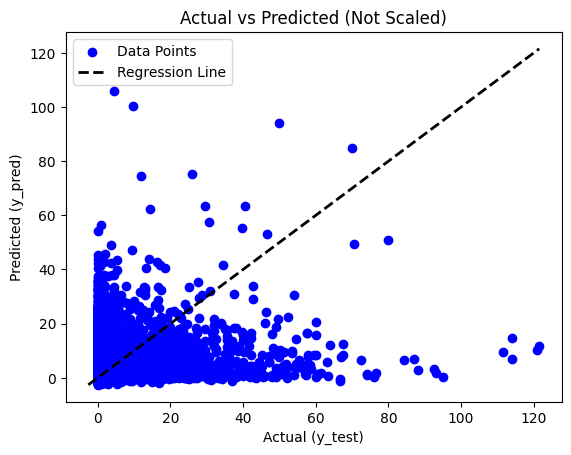

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_test), min(y_pred))
y_max = max(max(y_test), max(y_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Not Scaled)')
plt.legend()

plt.show()


In [36]:
# import matplotlib.pyplot as plt

# plt.scatter(y_test, y_pred_scaled, c='blue', label='Data Points')

# #garis diagonal
# y_min = min(min(y_test), min(y_pred_scaled))
# y_max = max(max(y_test), max(y_pred_scaled))
# plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

# plt.xlabel('Actual (y_test)')
# plt.ylabel('Predicted (y_pred)')

# plt.title('Actual vs Predicted (Scaled)')
# plt.legend()

# plt.show()


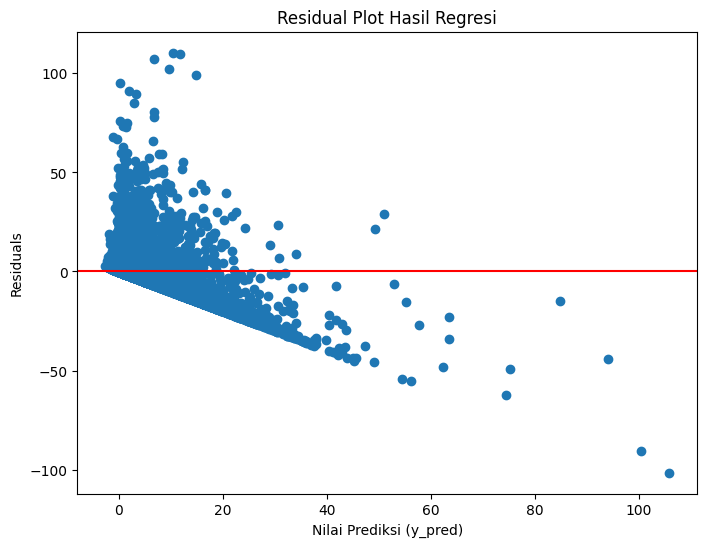

In [45]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Nilai Prediksi (y_pred)")
plt.ylabel("Residuals")
plt.title("Residual Plot Hasil Regresi")
plt.show()

In [46]:
X_test.columns

Index(['lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.',
       'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.',
       'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.',
       'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.',
       'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.',
       't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.', 'ELEV',
       'prec_nwp'],
      dtype='object')

In [47]:
val

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,prec_nwp
435178,97378,24.7566,21.4891,82.1950,4.183730,81.8849,0.655321,0.946551,0.000000,100170.0,0.0,0.016118,266.758,513.736,618.541,165.1750,0.0,22.0690,89.9339,10.45960,82.3575,14.7060,69.4322,10.87960,79.2171,-4.06504,30.0861,1.42261,255.126,141,5.536530e-17
435179,97378,28.2831,20.9179,64.4524,7.629230,90.4032,0.333161,1.000000,0.000000,100190.0,0.0,0.015578,254.634,801.633,864.540,172.5790,0.0,22.7278,82.2378,10.95400,89.4652,14.7995,56.1604,10.93170,78.6428,-2.82066,28.1026,1.65598,189.592,141,1.485530e-08
435180,97378,30.2541,20.1467,54.8386,8.755700,92.5849,0.061921,0.912796,0.000000,100066.0,0.0,0.014872,287.837,1055.880,1140.080,82.8893,0.0,23.8402,74.2155,11.36000,89.1876,14.8558,53.0249,10.77420,84.7104,-2.46031,28.0680,1.73109,167.915,141,0.000000e+00
435181,97378,30.0333,20.4536,56.6016,9.099400,108.2110,0.095264,0.403373,0.000000,99981.2,0.0,0.015194,294.436,985.159,1063.610,78.8886,0.0,23.7013,75.3950,11.44270,104.8220,15.1285,62.6710,10.29710,71.0174,-2.87034,29.9569,2.97210,179.861,141,0.000000e+00
435182,97378,27.3967,21.8156,71.7170,8.062560,110.9760,0.502173,0.384170,0.000000,100017.0,0.0,0.016507,275.700,653.862,680.247,283.7690,0.0,22.7633,84.6971,11.30270,108.7410,14.7611,78.7520,8.81694,66.3332,-3.13455,25.3112,3.46212,173.127,141,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543968,99992,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.0,0.017163,149.840,805.937,885.802,1304.6200,0.0,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.48475,260.4710,-4.69787,73.0758,2.29511,231.967,41,3.600690e-03
543969,99992,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.0,0.018095,155.006,1075.000,913.548,2185.4400,0.0,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.01409,248.4170,-4.63960,75.7922,2.05083,268.579,41,3.669660e+00
543970,99992,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.0,0.018342,126.417,566.484,735.727,1989.8300,0.0,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.06828,248.2330,-4.40575,77.1489,2.52709,272.922,41,4.045040e+00
543971,99992,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,0.0,0.018011,146.682,227.432,564.794,1213.6600,0.0,24.9000,74.5380,7.96001,239.4350,15.8302,80.2176,7.67518,256.2960,-4.33471,76.3170,3.07955,259.250,41,0.000000e+00


In [48]:
y_val

435178    0.0
435179    0.0
435180    0.0
435181    0.0
435182    0.0
         ... 
543968    0.0
543969    0.0
543970    0.0
543971    0.0
543972    0.0
Name: prec_obs, Length: 108795, dtype: float64

In [49]:
y_val_pred = model.predict(val)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

In [50]:
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse_val}')
print(f'Mean Absolute Error: {mae_val}')
print(f'R2 Score: {r2_val}\n')

Tanpa Scaling
Mean Squared Error: 49.754210346897466
Mean Absolute Error: 3.9261119728562046
R2 Score: -0.8641829537894667



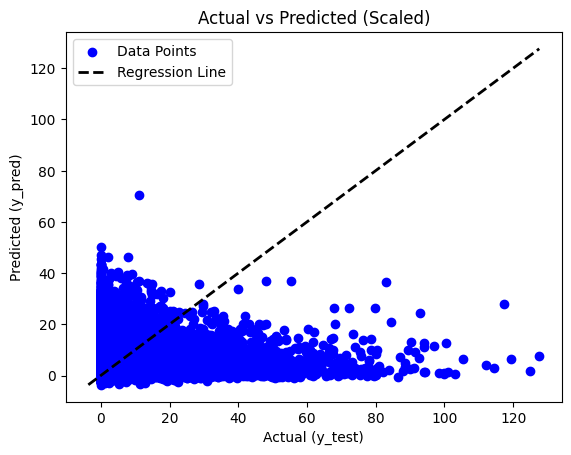

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_val, y_val_pred, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_val), min(y_val_pred))
y_max = max(max(y_val), max(y_val_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Scaled)')
plt.legend()


In [54]:
#OUTPUT

combined = pd.concat([df[['Date', 'lokasi', 'prec_nwp', 'LON','LAT','ELEV']],y_val, pd.Series(y_val_pred, index = val.index)], axis=1)
combined.columns = ['Date', 'lokasi', 'prec_nwp', 'LON','LAT','ELEV', 'prec_obs', 'prediction']
combined = combined.dropna()
combined.tail(15)

,Date,lokasi,prec_nwp,LON,LAT,ELEV,prec_obs,prediction
543958,2023-04-05 09:00:00,99992,1.348437,106.7564,-6.30253,41,0.0,0.184984
543959,2023-04-10 00:00:00,99992,0.024535,106.7564,-6.30253,41,0.0,0.710162
543960,2023-04-10 03:00:00,99992,0.011221,106.7564,-6.30253,41,5.0,0.698317
543961,2023-04-10 06:00:00,99992,0.789196,106.7564,-6.30253,41,0.0,0.119974
543962,2023-04-10 09:00:00,99992,0.797132,106.7564,-6.30253,41,0.0,-0.072895
543963,2023-04-11 00:00:00,99992,0.000000,106.7564,-6.30253,41,0.0,0.384488
543964,2023-04-11 03:00:00,99992,0.007416,106.7564,-6.30253,41,0.0,-0.321237
543965,2023-04-11 06:00:00,99992,0.298287,106.7564,-6.30253,41,0.0,-0.296184
543966,2023-04-11 09:00:00,99992,3.212260,106.7564,-6.30253,41,0.0,0.372598
543967,2023-04-12 00:00:00,99992,0.000000,106.7564,-6.30253,41,0.0,4.286796


In [55]:
combined.head(15)

,Date,lokasi,prec_nwp,LON,LAT,ELEV,prec_obs,prediction
435178,2021-09-09 21:00:00,97378,5.536530e-17,123.0739,-10.76662,141,0.0,0.984175
435179,2021-09-10 00:00:00,97378,1.485530e-08,123.0739,-10.76662,141,0.0,0.767088
435180,2021-09-10 03:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,-0.092386
435181,2021-09-10 06:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,-0.084692
435182,2021-09-10 09:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,0.314730
435183,2021-09-10 15:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,0.100148
435184,2021-09-10 18:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,-0.137247
435185,2021-09-10 21:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,-0.068808
435186,2021-09-11 00:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,-0.279729
435187,2021-09-11 03:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,-0.028830


In [56]:
combined.shape

(108795, 8)

In [57]:
combined_last_50 = combined.iloc[-50:]

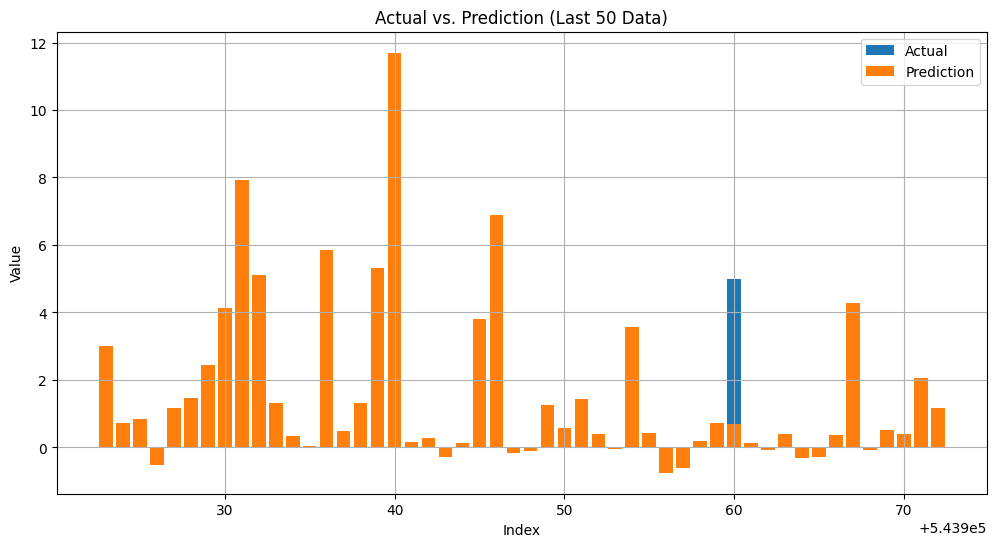

In [65]:
plt.figure(figsize=(12, 6))

plt.bar(combined_last_50.index, combined_last_50['prec_obs'], label='Actual')
plt.bar(combined_last_50.index, combined_last_50['prediction'], label='Prediction', alpha=0.5)

plt.title('Actual vs. Prediction (Last 50 Data)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.show()

In [60]:
# Finalizing model
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=False)

final_model = XGBRegressor( verbosity=2, n_jobs=-1, colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight = 2, n_estimators=160,
                     random_state=6601, reg_alpha=0.3, scale_pos_weight=13.200000000000003)

final_model.fit(X_train_final, y_train_final)
y_pred_final = model.predict(X_test_final)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

In [61]:
# Test the final model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_final = mean_squared_error(y_test_final, y_pred_final)
mae_final = mean_absolute_error(y_test_final, y_pred_final)
r2_final = r2_score(y_test_final, y_pred_final)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse_final}')
print(f'Mean Absolute Error: {mae_final}')
print(f'R2 Score: {r2_final}\n')

Tanpa Scaling
Mean Squared Error: 34.5824315753949
Mean Absolute Error: 2.885970204460521
R2 Score: -0.39016657628793316



In [63]:
# test prediction using ina_nwp_input
input_ina_nwp_filtered = input_ina_nwp.rename(
    columns={
        'suhu2m(degC)' : 'suhu2m.degC.',
        'dew2m(degC)' : 'dew2m.degC.',
        'rh2m(%)' : 'rh2m...',
        'wspeed(m/s)' : 'wspeed.m.s.',
        'wdir(deg)' : 'wdir.deg.',
        'lcloud(%)' : 'lcloud...',
        'mcloud(%)' : 'mcloud...' ,
        'hcloud(%)' : 'hcloud...',
        'surpre(Pa)' : 'surpre.Pa.' ,
        'clmix(kg/kg)' : 'clmix.kg.kg.' ,
        'wamix(kg/kg)' : 'wamix.kg.kg.' ,
        'outlr(W/m2)' : 'outlr.W.m2.' ,
        'pblh(m)' : 'pblh.m.',
        'lifcl(m)' : 'lifcl.m.' ,
        'cape(j/kg)' : 'cape.j.kg.' ,
        'mdbz' : 'mdbz' ,
        't950(degC)' : 't950.degC.' ,
        'rh950(%)' : 'rh950...',
        'ws950(m/s)' : 'ws950.m.s.' ,
        'wd950(deg)' : 'wd950.deg.' ,
        't800(degC)' : 't800.degC.' ,
        'rh800(%)' : 'rh800...' ,
        'ws800(m/s)' : 'ws800.m.s.',
        'wd800(deg)' : 'wd800.deg.' ,
        't500(degC)' : 't500.degC.' ,
        'rh500(%)' : 'rh500...' ,
        'ws500(m/s)' : 'ws500.m.s.' ,
        'wd500(deg)' : 'wd500.deg.',
})
output_humid_ina_nwp = final_model.predict(input_ina_nwp_filtered.drop(columns=['Date']))
output_humid_ina_nwp

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

ValueError: feature_names mismatch: ['lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.', 'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.', 'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.', 'ELEV', 'prec_nwp'] ['lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.', 'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.', 'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.', 'prec_nwp', 'ELEV']

In [71]:
#OUTPUT

output_df_pred = pd.concat([input_ina_nwp['Date'], input_ina_nwp_filtered[['lokasi', 'rh2m...']], pd.Series(output_humid_ina_nwp, index = input_ina_nwp_filtered.index)], axis=1)
output_df_pred.columns = ['Date','lokasi', 'rh2m...', 'prediction']
output_df_pred = output_df_pred.dropna()

In [72]:
output_df_pred

,Date,lokasi,rh2m...,prediction
0,2023-10-17 15:00:00,96001,80.3053,80.202545
1,2023-10-17 18:00:00,96001,77.4673,83.056625
2,2023-10-17 21:00:00,96001,81.3127,86.726898
3,2023-10-18 00:00:00,96001,80.4639,84.927826
4,2023-10-18 03:00:00,96001,75.7992,75.845688
...,...,...,...,...
4147,2023-10-20 00:00:00,99992,62.5816,78.465424
4148,2023-10-20 03:00:00,99992,40.4115,53.836456
4149,2023-10-20 06:00:00,99992,49.5108,56.297092
4150,2023-10-20 09:00:00,99992,57.6837,65.637527


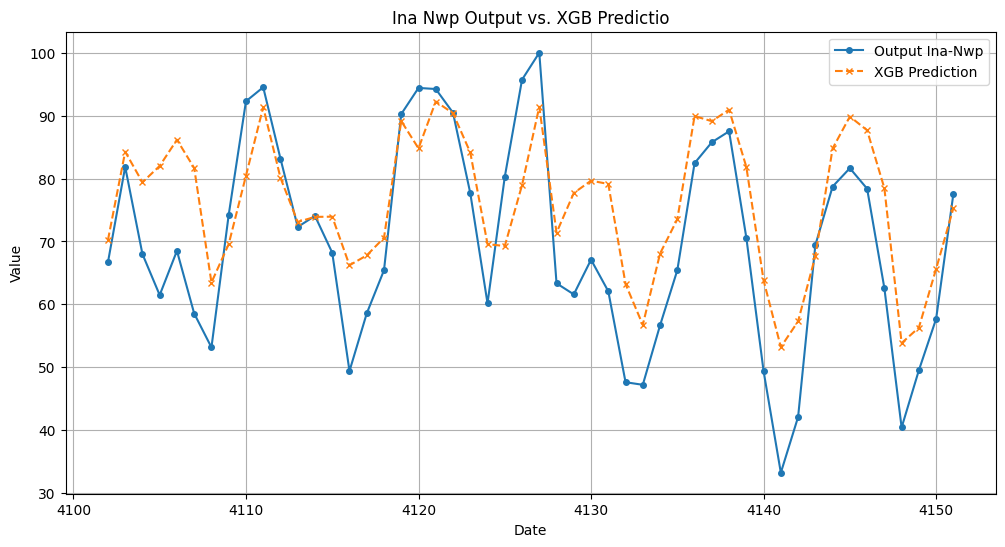

In [76]:
plt.figure(figsize=(12, 6))

plt.plot(output_df_pred.iloc[-50:].index, output_df_pred.iloc[-50:]['rh2m...'], label='Output Ina-Nwp', marker='o', markersize=4)
plt.plot(output_df_pred.iloc[-50:].index, output_df_pred.iloc[-50:]['prediction'], label='XGB Prediction', linestyle='--', marker='x', markersize=4)

plt.title('Ina Nwp Output vs. XGB Predictio')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.show()

In [50]:
model.save_model("humid_xgb_tuned_noShuffle.json")